###Import Libraries

In [13]:
import numpy as np
import pandas as pd



###Load and Explore the Data


In [12]:
# Assuming your data is in a CSV file
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

data


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [14]:
len(data)

5572

In [15]:
# check null values
data.isna().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [16]:
# removed Unamed columns
data = data[['v1','v2']]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# check dataset  for empty space  strings

blanks = []

# Iterate over DataFrame rows using itertuples
for i, v1, v2 in data.itertuples():
    # Check if v2 is a string and contains only whitespace
    if isinstance(v2, str) and v2.isspace():
        blanks.append(i)

# Check if there are any empty space strings
if blanks:
    print(f'There are {len(blanks)} rows with empty space strings in the dataset')

    # Remove rows with empty space strings
    data.drop(blanks, inplace=True)
    print('Rows with empty space strings have been removed.')
else:
    print('No empty space strings found in the dataset.')


No empty space strings found in the dataset.


In [19]:
# check for number of unique values
data.nunique()

v1       2
v2    5169
dtype: int64

In [20]:
# checking the balancement
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [22]:
# data['v2'].value_counts()


###.Statistical Analysis

In [24]:
# implement the T -Test
from scipy import stats
import warnings

# Shutting down the warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

# Calculate the length of each SMS message and add it to a new column 'v2_length'
data['v2_length'] = data['v2'].apply(len)

# Separate lengths for 'ham' and 'spam' messages
hams = data[data['v1'] == 'ham']['v2_length']
spams = data[data['v1'] == 'spam']['v2_length']

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(hams, spams)

# Set the significance level
alpha = 0.05

# Check for significance
if p_value < alpha:
    print('The difference in SMS lengths is statistically significant.')
else:
    print('The difference in SMS lengths is not statistically significant.')

# Print t-statistic and p-value
print(f'T-Stat: {t_stat}')
print(f'P-Value: {p_value}')

The difference in SMS lengths is statistically significant.
T-Stat: -31.350650338992136
P-Value: 7.702078585492358e-199


###Preprocessing

In [26]:
x = data['v2']
y = data['v1']
display(x,y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [27]:
# Encoding the Labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

display(y)

array([0, 0, 1, ..., 0, 0, 0])

In [28]:
# Train and Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

###Training the Dataset

In [29]:
# Import basic libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [30]:
# Creating the SVM Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

grid_params_svm = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__stop_words': [None, 'english'],
    'classifier__C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0],
}

model_svm = GridSearchCV(pipeline, grid_params_svm, cv=5, scoring='accuracy')

model_svm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('classifier', LinearSVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5,
                                           5.0, 10.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__stop_words': [None, 'english']},
             scoring='accuracy')

In [31]:
# Creating the NB pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

grid_params_nb = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__stop_words': [None, 'english'],
    'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0]
}

model_nb = GridSearchCV(pipeline, grid_params_nb, cv=5, scoring='accuracy')

model_nb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid={'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0,
                                               2.5, 5.0, 10.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__stop_words': [None, 'english']},
             scoring='accuracy')

###Metrics

In [33]:
# Create a function to perform classification metrics
def show_metrics(y_true, y_pred, grid_search=None):
    from sklearn.metrics import (classification_report, confusion_matrix,ConfusionMatrixDisplay)

    print('-' * 20)
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))

    if grid_search:
        print('-' * 20)
        print(grid_search.best_params_)

In [34]:
# SVM metrics
best_svm = model_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

show_metrics(y_test, y_pred_svm, model_svm)

--------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1464
           1       0.97      0.93      0.95       208

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672

[[1458    6]
 [  14  194]]
--------------------
{'classifier__C': 10.0, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}


In [35]:
# NB metrics
best_nb = model_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)

show_metrics(y_test, y_pred_nb, model_nb)

--------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1464
           1       0.96      0.92      0.94       208

    accuracy                           0.99      1672
   macro avg       0.97      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672

[[1456    8]
 [  16  192]]
--------------------
{'classifier__alpha': 0.01, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}


###Save the ML Model

In [36]:
def save_model(model, prefix=''):
    import joblib
    from datetime import datetime

    # Get the current date and time as a string to define the file name
    current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    filename = f"{prefix}model_{current_datetime}.joblib"

    joblib.dump(model, filename)

    print(f"Model saved to {filename}")

In [37]:
save_model(model_svm, prefix='svm_')
save_model(model_nb, prefix='nb_')

Model saved to svm_model_2023-11-23_04-41-35.joblib
Model saved to nb_model_2023-11-23_04-41-37.joblib


###Visualizing

In [38]:
!pip install wordcloud

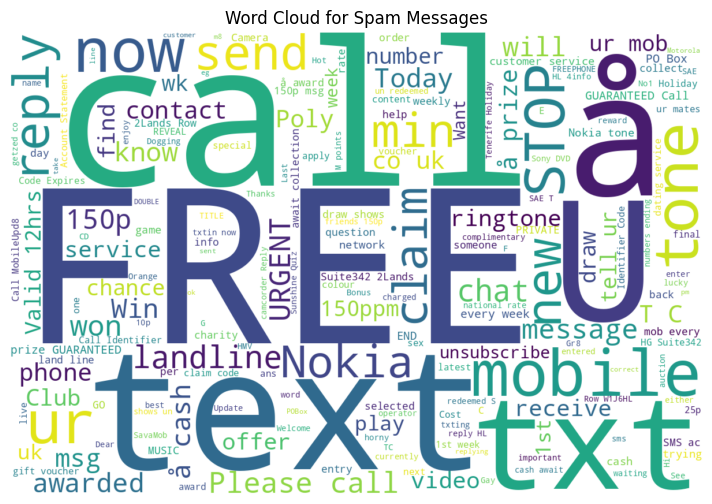

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine the predicted labels (0 for ham, 1 for spam) with the test messages
df_results = pd.DataFrame({'message': X_test, 'label': y_pred_svm})

# Filter out the spam messages
spam_messages = df_results[df_results['label'] == 1]['message']

# Join the spam messages into a single text
spam_text = " ".join(spam_messages)

# Generate a word cloud for spam messages
wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(spam_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Spam Messages")
plt.show()

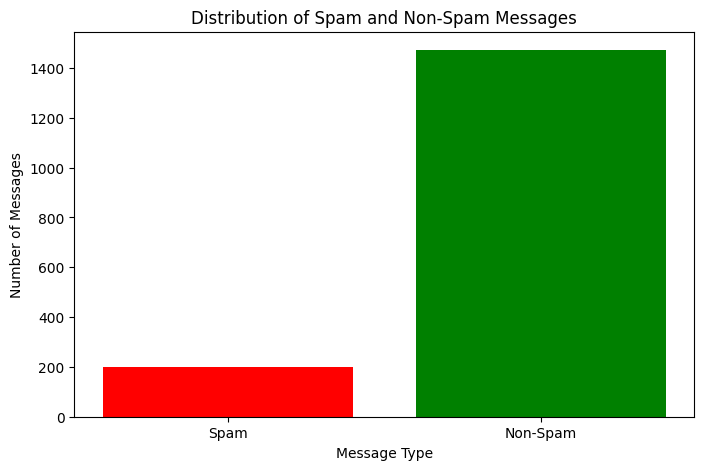

In [40]:
# Count the number of spam and non-spam messages in the test set
spam_count = df_results[df_results['label'] == 1].shape[0]
ham_count = df_results[df_results['label'] == 0].shape[0]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(['Spam', 'Non-Spam'], [spam_count, ham_count], color=['red', 'green'])
plt.title('Distribution of Spam and Non-Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Number of Messages')
plt.show()
